In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
import random
from sklearn.decomposition import PCA
import cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
path= "./data/train"
IMG_SIZE=34

## lets create our dataframe 

In [4]:
filenames=os.listdir(path)
category=[]
#dog is 1 cat is 0
for filename in filenames:
    if 'dog' in filename:
        category.append(1)
    else:
        category.append(0)

df={'filename':filenames,'label':category}
df=pd.DataFrame(df)


In [5]:
train_df, test_df = train_test_split(df, test_size=0.2,shuffle=True,random_state=42)
# s_train_df,validate_df=train_test_split(train_df, test_size=0.2,shuffle=True,random_state=42)
train_df = train_df.reset_index()
test_df = test_df.reset_index()
train_df=train_df.drop("index",axis=1)
test_df=test_df.drop("index",axis=1)

<AxesSubplot:xlabel='label', ylabel='count'>

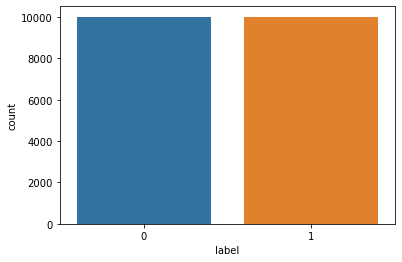

In [6]:
sns.countplot(data=train_df,x='label')

In [4]:
def convers(df):
    x=[]
    y=[]
    for i in range(len(df)):
        img_path = path+'/'+df["filename"][i]
        image = cv2.imread(img_path)
        image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
          #here, we are normalizing the images
        norm_image = image/255.0 
          #Creating and saving each image in the form of numerical data in an array
        x.append(norm_image.flatten())
        y.append(df["label"][i])
    x=np.array(x)
    y=np.array(y)
    return (x,y)

## lets split the data to train and test

In [5]:

x_train,y_train=convers(train_df)
x_test,y_test=convers(test_df)

In [214]:
x_train.shape

(20000, 3468)

In [6]:
pca=PCA(n_components=0.9)
x_red=pca.fit_transform(x_train)
x_test_red=pca.transform(x_test)

In [7]:
x_red.shape

(20000, 317)

In [8]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# knn_grid={'n_neighbors':[120,200,300]}
# knn_gs=GridSearchCV(KNeighborsClassifier(),knn_grid,verbose=3,n_jobs=-1)
# knn_gs_results =knn_gs.fit(x_red,y_train)
# xgb_grid={'n_estimators':[150,200,300,400],'learning_rate':[0.1,0.5,1]}
# xgb_gs=GridSearchCV(xgb.XGBClassifier(use_label_encoder=False,eval_metric="mlogloss"),xgb_grid,cv=5,
#                     scoring='accuracy',verbose=10,n_jobs=-1)
# xgb_gs_results =xgb_gs.fit(x_red,y_train)
# ens_grid={'base_estimator':[LogisticRegression(multi_class='ovr',max_iter=1000),RandomForestClassifier(n_estimators=1200)
#                            ]}
# ada_gs=GridSearchCV(AdaBoostClassifier(),ens_grid,cv=3,
#                      scoring='accuracy',verbose=3,n_jobs=-1)
# ada_gs_results=ada_gs.fit(x_red,y_train)
# xrf_grid={'n_estimators':[500,700,1000,1200,2000]}
# xrf_gs=GridSearchCV(ExtraTreesClassifier(bootstrap=True,oob_score=True,random_state=42),xrf_grid,cv=5, scoring='accuracy',verbose=10,n_jobs=-1)
# xrf_gs_result=xrf_gs.fit(x_red,y_train)
# ada_params={'lr':LogisticRegression(),'rf':RandomForestClassifier(n_estimators=400,oob_score=True),'XRF':ExtraTreesClassifier()}
# C = np.logspace(0, 4, num=10)
# penalty = ['l1', 'l2']
# solver = ['liblinear', 'saga']
# hyperparameters = dict(C=C, penalty=penalty, solver=solver)
# randomizedsearch = RandomizedSearchCV(LogisticRegression(), hyperparameters,random_state=42, n_iter=100, cv=5, verbose=0, n_jobs=-1)
# best_model_random = randomizedsearch.fit(x_red, y_train)
# print(best_model_random.best_estimator_)
#LogisticRegression(C=7.742636826811269, penalty='l1', solver='liblinear')
# parameters = {'booster':['gbtree','gblinear'],
#               'learning_rate': [0.01,0.05,0.1,0.5], 
#               'max_depth': [2,3,5,6],
#               'min_child_weight': [5,10,15,20],
#               'colsample_bytree': [0.4,0.8, 0.9, 1],
#               'n_estimators': [400,500,600,1000],
#               "reg_alpha"   : [0.5,0.2,1],
#               "reg_lambda"  : [2,3,5],
#               "gamma"       : [0,1,5,10]}
# xgb_model = xgb.XGBClassifier(random_state=42,eval_metric='auc',use_label_encoder=False)
# grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters,cv=5,n_iter=50,scoring='accuracy',verbose=2,n_jobs=-1)
# grid_obj_xgb.fit(x_red, y_train,verbose = 1)
# y_pred_train = grid_obj_xgb.predict(x_red)
# y_pred_test = grid_obj_xgb.predict(x_test_red)
# ada_params={'base_estimator':[ExtraTreesClassifier(n_estimators=1000),LogisticRegression(C=7.742636826811269, penalty='l1', solver='liblinear'),
#                              RandomForestClassifier(n_estimators=1000)],'learning_rate':[0.01,0.05,0.1]}
# #err_xgb_train=mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')
# print(grid_obj_xgb.best_estimator_)
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.9, eval_metric='auc',
#               gamma=0, gpu_id=-1, importance_type='gain',
#               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
#               max_depth=5, min_child_weight=15, missing=nan,
#               monotone_constraints='()', n_estimators=400, n_jobs=16,
#               num_parallel_tree=1, random_state=42, reg_alpha=0.2, reg_lambda=3,
#               scale_pos_weight=1, subsample=1, tree_method='exact',
#               use_label_encoder=False, validate_parameters=1, verbosity=None)
knn_params={'n_neighbors':[20,50,90,130],'leaf_size':[30,70,120]}
knn_clf=KNeighborsClassifier()
RandomizedSearchCV(knn_clf,knn_params, cv=5,n_iter=50,scoring='accuracy',verbose=2,n_jobs=-1)
xrf_grid={'n_estimators':[500,700,1000,1200,2000]}
xrf_clf=ExtraTreesClassifier()
RandomizedSearchCV(xrf_clf,xrf_grid, cv=5,n_iter=50,scoring='accuracy',verbose=2,n_jobs=-1)
ada_params={'base_estimator':[ExtraTreesClassifier(n_estimators=1000),LogisticRegression(C=7.742636826811269, penalty='l1', solver='liblinear'),
                              RandomForestClassifier(n_estimators=1000)],'learning_rate':[0.01,0.05,0.1],'n_estimators':[100,400,700]}
ada_clf=AdaBoostClassifier()
grid_obj_ada = RandomizedSearchCV(ada_clf,ada_params, cv=5,n_iter=50,scoring='accuracy',verbose=2,n_jobs=-1)
grid_obj_ada.fit(x_red,y_train)
print(grid_obj_ada.best_estimator_)
# AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000),
#                    learning_rate=0.05)

C:\Users\talso\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 27 candidates, totalling 135 fits


## this was a function used to find the error and accuray of a model to try
## and minimize overfitting and underfitting

In [13]:
from matplotlib import pyplot
def vis_data(model,X_test,y_test,X_train,y_train):

    eval_set = [(X_train, y_train), (X_test, y_test)]
    eval_metric = ["auc","error"]
    # fit the model
    model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set,verbose=False)
    # evaluate performance
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print('Accuracy: %.3f' % score)
    # retrieve performance metrics
    results = model.evals_result()
    # plot learning curves
    plt.subplot(1, 2, 1)
    pyplot.plot(results['validation_0']['auc'], label='train')
    pyplot.plot(results['validation_1']['auc'], label='test')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    print(classification_report(y_pred,y_test,digits=4))
    # plot classification error
    fig, ax = pyplot.subplots()
    plt.subplot(1, 2, 2)
    pyplot.plot(results['validation_0']['error'], label='train')
    pyplot.plot(results['validation_1']['error'], label='test')
   # ax.legend()
    pyplot.ylabel('Classification Error')
    pyplot.title('Classification Error')
    pyplot.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
fpr=dict()
tpr=dict()
tps=dict()
aucs=[]
i=0
#this function is used to get the fpr ,tpr,and auc of the model!
def get_stats(model,cx_test,cy_test):
    c_pred=model.predict(cx_test)
    c_prob=model.predict_proba(cx_test)
    c_prob = c_prob[:, 1]
    c_auc=roc_auc_score(cy_test,c_prob)
    c_fpr,c_tpr ,_=roc_curve(cy_test,c_prob)
    con=metrics.plot_confusion_matrix(model, cx_test, cy_test,cmap="YlGnBu")
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None)
    plt.show()
    print(classification_report(y_test,c_pred))
    score = cross_val_score(model, x, y, cv=10, scoring='accuracy')
    print(f'{type(model).__name__} Cross validation mean: ',score.mean())
    print(f'{type(model).__name__} Auccuracy score: ',metrics.accuracy_score(y_test,c_pred)*100)
    print(f"{type(model).__name__} ROC: =%.2f"%c_auc)
    return c_fpr,c_tpr,type(model).__name__


In [19]:
ada_clf=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000),
                   learning_rate=0.05)
ada_clf.fit(x_red,y_train)
fpr[i],tpr[i],tps[i]=get_stats(ada_clf,x_test,y_test)
i+=1

TypeError: fit() got an unexpected keyword argument 'eval_metric'

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.679


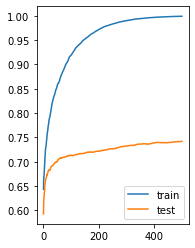

              precision    recall  f1-score   support

           0     0.6970    0.6755    0.6861      2595
           1     0.6612    0.6832    0.6720      2405

    accuracy                         0.6792      5000
   macro avg     0.6791    0.6793    0.6790      5000
weighted avg     0.6798    0.6792    0.6793      5000



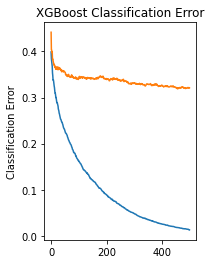

In [17]:

xgb_clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5,monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=1, reg_lambda=3, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_clf.fit(x_red,y_train)
fpr[i],tpr[i],tps[i]=get_stats(xgb_clf,x_test,y_test)
i+=1

In [18]:
vote_clf =VotingClassifier(estimators=[
            ('knn_bag', BaggingClassifier(KNeighborsClassifier(n_neighbors=30),n_jobs=-1)),
            ('xgb',xgb_clf),
            ('rf', ExtraTreesClassifier(n_estimators=1200)),
    ('ada',AdaBoostClassifier(RandomForestClassifier(n_estimators=1000,oob_score=True),learning_rate=0.5,random_state=42))
        ],weights=[1,3,1,2],voting='soft', n_jobs=-1,verbose=True)
vote_clf.fit(x_red,y_train)
fpr[i],tpr[i],tps[i]=get_stats(vote_clf,x_test,y_test)
i+=1

              precision    recall  f1-score   support

           0     0.6790    0.6998    0.6893      2515
           1     0.6865    0.6652    0.6757      2485

    accuracy                         0.6826      5000
   macro avg     0.6827    0.6825    0.6825      5000
weighted avg     0.6827    0.6826    0.6825      5000



In [ ]:
stk_clf= StackingClassifier(
        estimators=[
          ('lr', BaggingClassifier(KNeighborsClassifier(n_neighbors=3,weights='distance'),n_jobs=-1)),
          ('ada', AdaBoostClassifier(RandomForestClassifier(n_estimators=400,oob_score=True),learning_rate=0.5,random_state=42))
        ],final_estimator=xgb.XGBClassifier(n_estimators=150,learning_rate=0.5,use_label_encoder=False,eval_metric="mlogloss")
    , voting='soft', n_jobs=-1)
stk_clf.fit(x_red,y_train)
fpr[i],tpr[i],tps[i]=get_stats(stk_clf,x_test,y_test)
i+=1

In [ ]:
Bag_clf= BaggingClassifier(
        estimators=[
            ('knn',KNeighborsClassifier(n_neighbors=30)),
          ('lr',LogisticRegression(C=7.742636826811269, penalty='l1', solver='liblinear') ),
          ('ada', AdaBoostClassifier(RandomForestClassifier(n_estimators=400,oob_score=True),learning_rate=0.5,random_state=42))
        ],final_estimator=xgb.XGBClassifier(n_estimators=150,learning_rate=0.5,use_label_encoder=False,eval_metric="mlogloss")
    , voting='soft', n_jobs=-1)
Bag_clf.fit(x_red,y_train)
fpr[i],tpr[i],tps[i]=get_stats(Bag_clf,x_test,y_test)
i+=1

In [189]:
rf_clf=RandomForestClassifier(n_estimators=400,oob_score=True)
rf_clf.fit(x_red,y_train)
y_pred=rf_clf.predict(x_test_red)
fpr[i],tpr[i],tps[i]=get_stats(rf_clf,x_test,y_test)
i+=1

              precision    recall  f1-score   support

           0     0.6265    0.6605    0.6431      2545
           1     0.6271    0.5919    0.6090      2455

    accuracy                         0.6268      5000
   macro avg     0.6268    0.6262    0.6260      5000
weighted avg     0.6268    0.6268    0.6263      5000

